In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [2]:
col_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
boston = pd.read_csv('housing.data', delim_whitespace = True, header = None, names = col_names)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
X = boston.iloc[:, :-1] # Feature-matrix
y = boston.iloc[:, -1] # Target variable

# Using Statsmodel

For bias/intercept, we need to add a coefficient term.

In [4]:
X_constant = sm.add_constant(X)

In [5]:
X_constant.head(2)

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14


### Now running 'Ordinary Least Square'

In [6]:
model = sm.OLS(y, X_constant)

In [7]:
ols = model.fit()

In [8]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 11 Jun 2019   Prob (F-statistic):          6.72e-135
Time:                        16:24:34   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
b              0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Manually providing formula to statsmodel

In [9]:
linear_form = smf.ols(data = boston, formula= 'y~ crim + zn+ indus + nox + rm + age + dis + rad + tax + ptratio + b + lstat')
lr_form = linear_form.fit()

In [10]:
lr_form.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Tue, 11 Jun 2019   Prob (F-statistic):          7.30e-134
Time:                        16:24:34   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8920      5.147      7.168      0.000      26.780      47.004
crim          -0.1131      0.033     -3.417      0.001      -0.178      -0.048
zn             0.0471      0.014      3.398      0.001       0.020       0.074
indus          0.0403      0.062      0.653      0.514      -0.081       0.162
nox          -17.3670      3.851     -4.509      0.000     -24.934      -9.800
rm             3.8505      0.421      9.137      0.000       3.023       4.678
age            0.0028      0.013      0.209      0.834      -0.023       0.029
dis           -1.4854      0.201     -7.383      0.000      -1.881      -1.090
rad            0.3283      0.067      4.934      0.000       0.198       0.459
tax           -0.0138      0.004     -3.653      0.000      -0.021      -0.006
ptratio       -0.9910      0.131     -7.542      0.000      -1.249      -0.733
b              0.0097      0.003      3.600      0.000       0.004       0.015
lstat         -0.5342      0.051    -10.459      0.000      -0.635      -0.434
==============================================================================
Omnibus:                      190.856   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              898.352
Skew:                           1.619   Prob(JB):                    8.42e-196
Kurtosis:                       8.668   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Correlation Matrix

In [11]:
corr_matrix = boston.corr()
corr_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### Let's remove weakly correlated values

In [12]:
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
corr_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.625505,0.000000,0.0,0.0,0.000000,0.000000
zn,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.664408,0.000000,0.000000,0.0,0.0,0.000000,0.000000
indus,0.000000,0.000000,1.000000,0.0,0.763651,0.000000,0.644779,-0.708027,0.000000,0.720760,0.0,0.0,0.603800,0.000000
chas,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
nox,0.000000,0.000000,0.763651,0.0,1.000000,0.000000,0.731470,-0.769230,0.611441,0.668023,0.0,0.0,0.000000,0.000000
rm,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-0.613808,0.695360
age,0.000000,0.000000,0.644779,0.0,0.731470,0.000000,1.000000,-0.747881,0.000000,0.000000,0.0,0.0,0.602339,0.000000
dis,0.000000,0.664408,-0.708027,0.0,-0.769230,0.000000,-0.747881,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
rad,0.625505,0.000000,0.000000,0.0,0.611441,0.000000,0.000000,0.000000,1.000000,0.910228,0.0,0.0,0.000000,0.000000
tax,0.000000,0.000000,0.720760,0.0,0.668023,0.000000,0.000000,0.000000,0.910228,1.000000,0.0,0.0,0.000000,0.000000


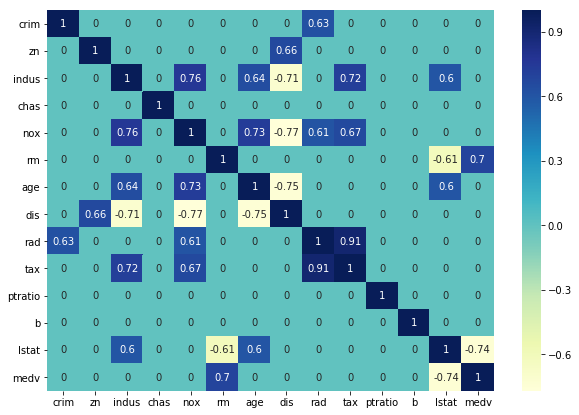

In [13]:
plt.figure(figsize = (10,7))
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')

# Detecting Collinearity with Eigenvectors

In [14]:
eigenvalue, eigenvector = np.linalg.eig(boston.corr())

In [15]:
# Smaller values mean presence of collinearity
pd.Series(eigenvalue).sort_values(ascending = True)

8     0.060327
9     0.134010
12    0.182987
13    0.212790
11    0.252257
10    0.277264
7     0.403077
6     0.535411
5     0.660011
4     0.850899
3     0.886540
2     1.348906
1     1.649532
0     6.545990
dtype: float64

# Feature Extraction
We'll be checking : 

-  Checking direction of coefficient
-  Checking impact of the variable

### 1. Standardise Variable to Identify Key Feature(s)
To check impact of a variable, this is necessary

In [16]:
model = LinearRegression()

In [17]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
result = pd.DataFrame(list(zip(model.coef_, boston.columns)), columns = ['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by = 'coefficient', ascending = False)

,coefficient
name,
nox,17.766611
rm,3.809865
chas,2.686734
dis,1.475567
ptratio,0.952747
lstat,0.524758
rad,0.306049
crim,0.108011
zn,0.046420


> We can see that values are very irregularly scaled and they can affect our model performance. We need to properly scale our values.

In [43]:
scaler = StandardScaler()

In [59]:
standardise_linreg = make_pipeline(scaler, model)
standardise_linreg.fit(X, y)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [51]:
result = pd.DataFrame(list(zip(standardise_linreg.steps[1][1].coef_, boston.columns)), columns = ['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by = 'coefficient', ascending = False)

,coefficient
name,
lstat,3.743627
dis,3.104044
rm,2.674230
rad,2.662218
tax,2.076782
ptratio,2.060607
nox,2.056718
zn,1.081569
crim,0.928146


> The values are now properly scaled up.
    All data will have mean value 0 and S.D. 1

### 2. Using <i>R<sup>2</sup></i> to identify key features
- Compare R<sup>2</sup> of a model against R<sup>2</sup> of a model without a feature
- If R<sup>2</sup> changes too much, then feature is important

In [67]:
linear_reg = smf.ols(data = boston, formula= 'y~ crim + zn+ indus + nox + rm + age + dis + rad + tax + ptratio + b + lstat')
benchmark  = linear_reg.fit()
r2_score(y, benchmark.predict(boston))

0.7355165089722999

In the above correlation matrix, we observed that lstat and price have strong negative correlation. Let's see the importance of lstat through <i>R<sup>2</sup></i>

In [68]:
linear_reg_nolstat = smf.ols(data = boston, formula= 'y~ crim + zn+ indus + nox + rm + age + dis + rad + tax + ptratio + b')
benchmark  = linear_reg_nolstat.fit()
r2_score(y, benchmark.predict(boston))

0.6768309273891981

> Yes, lstat is indeed an important feature for this prediciton.

Let's try Age now.

In [70]:
linear_reg_noage = smf.ols(data = boston, formula= 'y~ crim + zn+ indus + nox + rm + dis + rad + tax + ptratio + b + lstat')
benchmark  = linear_reg_noage.fit()
r2_score(y, benchmark.predict(boston))

0.7354930382923393

> Looks like age is not so relevant for this prediciton.